# Statistika výsledků Gran Prix Formula 1
>Data byla získana z webu kaggle (https://www.kaggle.com/datasets/conorvaneden/best-songs-on-spotify-for-every-year-2000-2023).<br>
### Popis dat:<br>
- __Best Songs on Spotify from 1996-2023:__<br>
tabulka s nasledujícími sloupci: <br>
title,artist,top genre,year,bpm,energy,danceability ,dB,liveness,valence,duration,acousticness,speechiness ,popularity,,
<br>

    

In [184]:
import sys
#!{sys.executable} -m pip install numpy
#!{sys.executable} -m pip install pandas
#!{sys.executable} -m pip install plotly
#!{sys.executable} -m pip install matplotlib
#!{sys.executable} -m pip install scipy
#!{sys.executable} -m pip install statsmodels


import numpy
import plotly
import matplotlib.pyplot as plt
import pandas as pd
import os
import scipy.stats as stats
import statsmodels.api as sm

for dirname, _, filenames in os.walk('.'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

.\notes.ipynb
.\Songs.csv


In [185]:
table = pd.read_csv('.\Songs.csv', delimiter=';')
popularity = pd.read_csv(".\Songs.csv", usecols=['popularity'], delimiter=';')

table.head()

#table.describe()
#print(popularity)
#print(table)
#popularity.describe()


,title,artist,top genre,year,bpm,energy,danceability,dB,liveness,valence,duration,acousticness,speechiness,popularity
0,Flowers,Miley Cyrus,pop,2023,118,68,71,-4,3,65,200,6,7,98
1,Cupid - Twin Ver.,FIFTY FIFTY,k-pop girl group,2023,120,59,78,-8,35,73,174,44,3,97
2,BESO,ROSALÍA,pop,2023,95,64,77,-7,17,53,195,74,14,96
3,Boy's a liar Pt. 2,PinkPantheress,bronx drill,2023,133,81,70,-8,25,86,131,25,5,96
4,Creepin' (with The Weeknd & 21 Savage),Metro Boomin,rap,2022,98,62,72,-6,8,17,222,42,5,96


### 1 
Budeme zkoumat, zda delka pisnicek je dobře modelovana normálním rozdělením. <br>
H0 ... <br>
.. <br>

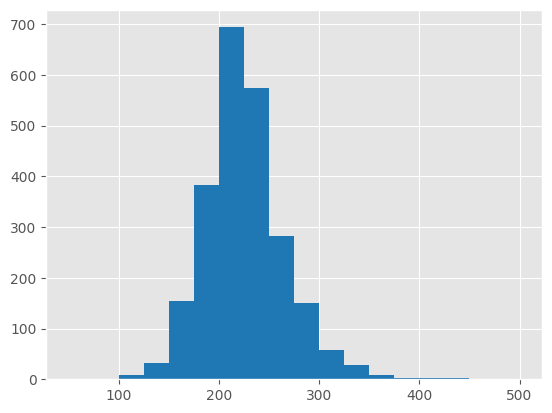

count    2385.000000
mean      225.946751
std        43.226704
min       115.000000
25%       200.000000
50%       221.000000
75%       246.000000
max       688.000000
Name: duration, dtype: float64

In [186]:
duration = table['duration'] #duration in seconds
#print(duration)
#plt.style.use('ggplot')
plt.hist(duration, bins=[50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400, 425, 450, 475, 500], color='tab:blue')
#plt.hist(duration, 20, color='tab:cyan')
#plt.hist(duration, bins=[100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400])
plt.show()
duration.describe()

Ted spocteme prumer, smerodatnou odchulku a rozptyl

In [187]:
duration_mean = duration.mean()
print(duration_mean)
duration_var = duration.var()
print(numpy.var(duration))
print(duration_var)
duration_std = numpy.std(duration)
print("deviation = ", duration_std)

225.946750524109
1867.7644600908015
1868.547918337484
deviation =  43.21764061226389


Vytvorim vektorove intervaly pro delku pisnicek <150, <200, <250, <300 , <350, <400, <450, <500, <550, >=550. Spocteme pocet pisnocek pro kazdy interval a pro kazdy interval spocteme z-skore. Z-skore pocitame jako podil, kde v citateli je rozdil horni hranice a prumeru a a ve jmenovateli smerodatna odchylka.

In [188]:
bounds = [150, 200, 250, 300, 350, 400, 450, 500, 550]
sum_bounds = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
#sum_bounds[0] = sum(x < bounds[0] for x in duration)
sum_bounds[0] = sum(duration < bounds[0])
#sum_bounds[9] = sum(x >= bounds[8] for x in duration)
sum_bounds[9] = sum(duration >= bounds[8])
for i in range(1, len(bounds)):
    #print(i)
#    sum_bounds[i] = sum(x < bounds[i] for x in duration) - sum(x < bounds[i-1] for x in duration)
    sum_bounds[i] = sum(duration < bounds[i]) - sum(duration < bounds[i-1])

print(sum_bounds)
print(sum(sum_bounds))
z_score = [0, 0, 0, 0, 0, 0, 0, 0, 0]
for i in range(0, len(bounds)):
    z_score[i] = (bounds[i]- duration_mean)/duration_std
print(z_score)
#Ze z skóre spočítám plochu pod křivkou normální distribuce N(0,1)
area_under = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
for i in range(len(z_score)):
    #print(i)
    area_under[i] = stats.norm.cdf(z_score[i])
area_under[len(area_under)-1] = 1
print(area_under)

[40, 538, 1268, 433, 86, 10, 5, 1, 1, 3]
2385
[-1.757309039738684, -0.6003740638434132, 0.5565609120518576, 1.7134958879471283, 2.870430863842399, 4.02736583973767, 5.18430081563294, 6.341235791528211, 7.498170767423482]
[0.039432573906099055, 0.2741284844640677, 0.7110862668547735, 0.9566893253931492, 0.9979504358743485, 0.9999717973835782, 0.9999998915866347, 0.9999999998860353, 0.9999999999999677, 1]


Dále spočítám plochu v rámci intervalů

In [189]:
area_inside = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
area_inside[0] = round(area_under[0], 2)

for i in range(1, len(area_under)):
    x = area_under[i] - area_under[i-1]
    area_inside[i] = round(x, 2)
    #print(round(area_inside[i]*100, 2))
print(area_inside)
print(sum_bounds)

[0.04, 0.23, 0.44, 0.25, 0.04, 0.0, 0.0, 0.0, 0.0, 0.0]
[40, 538, 1268, 433, 86, 10, 5, 1, 1, 3]


Plochu v rámci intervalů využiji jako očekávané pravděpodobnosti pro chí-kvadrát test.

In [191]:
sum_elements = sum(sum_bounds)
#print(sum_elements)

#for i in range(len(sum_bounds)):
#    sum_bounds[i] = sum_bounds[i] / sum_elements
#    print(sum_bounds[i])

for i in range(len(area_inside)):
    area_inside[i] = area_inside[i] * sum_elements
    print(area_inside[i])
stats.chisquare(sum_bounds, f_exp=area_inside)

chi = 0
for i in range(len(area_inside)):
    chi = chi + ((sum_bounds[i] - area_inside[i])^2)/area_inside[i]  
print(chi)    

95.4
548.5500000000001
1049.4
596.25
95.4
0.0
0.0
0.0
0.0
0.0


c:\Users\ncoro\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_stats_py.py:7407: RuntimeWarning: divide by zero encountered in divide
  terms = (f_obs_float - f_exp)**2 / f_exp


TypeError: ufunc 'bitwise_xor' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

Shapiro test

In [ ]:
res = stats.shapiro(duration)
print(res)
res.statistic

ShapiroResult(statistic=0.906105101108551, pvalue=5.1749929866740065e-36)


0.906105101108551

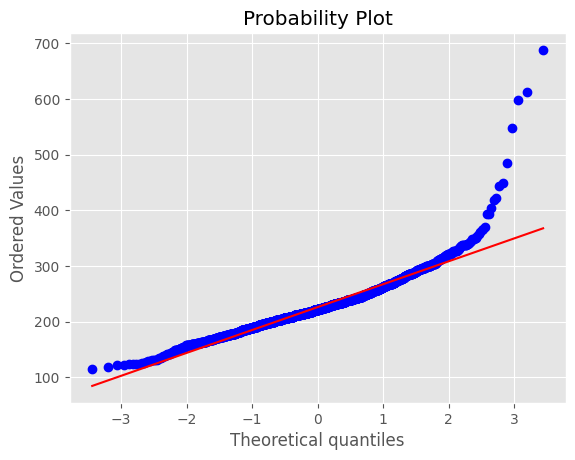

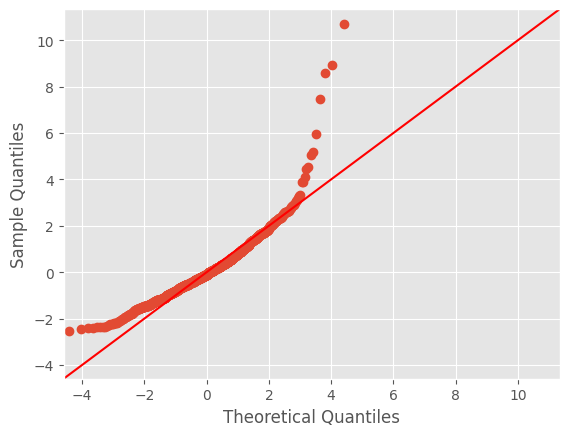

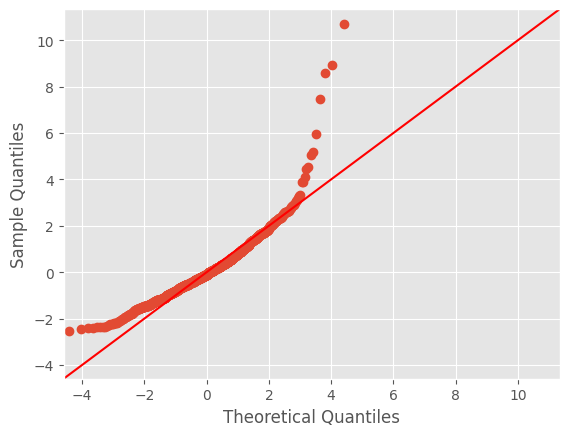

In [ ]:
stats.probplot(duration, dist="norm", plot=plt)
plt.show()
sm.qqplot(duration, stats.t, fit=True, line='45') 

